In [379]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt

In [380]:
maxAcc = 0.0
maxIter = 0
C_Lambda = 0.8
TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10
PHI = []

In [381]:
df_hum = pd.read_csv(r'D:\sem1\intro to ml\project 2\HumanObserved-Dataset\HumanObserved-Dataset\HumanObserved-Features-Data\HumanObserved-Features-Data.csv')
df_hum_same = pd.read_csv(r'D:\sem1\intro to ml\project 2\HumanObserved-Dataset\HumanObserved-Dataset\HumanObserved-Features-Data\diffn_pairs.csv')
df_hum_diff = pd.read_csv(r'D:\sem1\intro to ml\project 2\HumanObserved-Dataset\HumanObserved-Dataset\HumanObserved-Features-Data\same_pairs.csv')
#df_hum_same = np.array_split(df_hum_same1,395) 
#df_hum_diff = np.array_split(df_hum_diff1,790)
#print(df_hum_diff)
frames1 = [df_hum_same,df_hum_diff]
df_hum.drop(df_hum.columns[[0]], axis=1,inplace=True)
df_output1 = pd.concat(frames1)
#col_hum = ['img_id_A','img_id_B','t']
#df.rename(columns ={39: ‘col40’}, inplace =True
df_o1 = df_output1.rename(index = str, columns ={"img_id_A" : "img_id"})
con_num1 = pd.merge(df_o1, df_hum, on='img_id')
#print(con_num1)
con_num3 = con_num1.rename(index = str, columns ={"img_id" : "img_id_A"})
#df_o2 = df_o1.rename(index = str, columns ={"img_id" : "img_id_A"})

df_o3 = con_num3.rename(index = str, columns ={"img_id_B" : "img_id"})

con_num2 = pd.merge(df_o3, df_hum, on='img_id')

final_con = con_num2.rename(index = str, columns ={"img_id" : "img_id_B"})

final_con.insert(21,'target_new',0)

final_con.loc[:,'target_new'] = final_con['target']

final_con.drop(final_con.columns[[2]], axis=1,inplace=True)
final_con.sort_values('target_new', inplace = True,ascending = False)
#dfs of 0 and 1
df_o = final_con[final_con['target_new'] == 0]

df_1 = final_con[final_con['target_new'] == 1]
dfo=df_o.sample(n=1845)
#print(dfo)

frames2 = [df_1,dfo]
final_data1 = pd.concat(frames2)
#print(final_set)
tardf = final_con[['target_new']].copy()

final_data = final_data1.sample(frac=1, axis=0).reset_index(drop=True)
final_data.to_csv(r"C:\Users\Jayanth\Downloads\final-human.csv")
print(final_data)
con_copy = final_con.copy()
 


     img_id_A img_id_B  f1_x  f2_x  f3_x  f4_x  f5_x  f6_x  f7_x  f8_x  \
0       1219b    1219c     2     0     1     0     2     1     0     3   
1       1197a    1197c     1     4     1     3     0     2     1     0   
2       1543a    1562b     3     1     1     0     2     2     0     4   
3       1329b    1329c     1     1     1     3     2     2     3     0   
4       0451a    1325c     2     1     1     0     2     1     0     0   
5       1499b    1499c     2     1     1     2     2     2     3     4   
6       1204a    1521c     0     0     1     0     2     2     1     0   
7       1432b    1140a     3     1     1     0     1     2     1     4   
8       0969a    0535b     2     2     1     1     2     2     1     2   
9       1240a    0374a     1     0     1     3     2     2     3     1   
10      0349b    1450c     0     1     1     3     2     2     3     1   
11      1424a    0327c     3     4     1     0     2     2     1     2   
12      0314c    0314a     1     1    

In [382]:
def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(int(row[0]))
    #print("Raw Training Generated..")
    return t

# put the data of csv file to matrix form
def GenerateRawData(filePath):    
    dataMatrix = [] 
    dataMatrix1 = []
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)
            
    #dataMatrix1 = np.transpose(dataMatrix)     
    #print ("Data Matrix Generated..")
    dataMatrix = np.transpose(dataMatrix) 
    return dataMatrix
# Training percent is set (which can be changed for tuning)
# target list is made up from the data sets passed
def GenerateTrainingTarget(rawTraining,TrainingPercent = 80):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    t           = rawTraining[:TrainingLen]
    #print(str(TrainingPercent) + "% Training Target Generated..")
    return t
# generate the data matrix with the 80% training set

def GenerateTrainingDataMatrix(rawData, TrainingPercent = 80):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
    #print(str(TrainingPercent) + "% Training Data Generated..")
    return d2
#data being made for validation of the model which is 10% of the dataset

def GenerateValData(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..")  
    return dataMatrix
def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Target Data Generated..")
    return t

#BIGSIGMA : generates a covariance matrix.Each value will be covariance of a element with i-th and j-th elements of an random vector
#this is used to regularize
def GenerateBigSigma(Data, MuMatrix,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    print(DataT)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j] + 0.2
    
    BigSigma = np.dot(200,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma

def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L
#gets guassian radial basis function
def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x
#This generates the design matrix, features of the original input
def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    #print(BigSigInv.shape)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI
# to generate the weight matrix
def GetWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    ##print ("Training Weights Generated..")
    return W
#gets the linear regression values
def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    ##print ("Test Out Generated..")
    return Y
#function to get the root mean square error
def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

In [383]:
# splitting final data into training and testing 
train1 = final_data.drop(final_data.columns[[0]], axis=1)
train2 = train1.drop(train1.columns[[0]], axis=1)
train2.drop(train2.columns[[18]], axis=1,inplace = True)
train3 = train2[(train2.T != 0).any()]
#print(train3)
tar_ma = final_data[['target_new']].copy()
train3.to_csv(r"D:\sem1\intro to ml\project 2\final-human.csv", header=False,index =False)
tar_ma.to_csv(r"D:\sem1\intro to ml\project 2\target.csv", header=False,index = False)

#print(train2)
train=train3.iloc[:2110]
vali = train3.iloc[2110:2374]
test = train3.iloc[2374:]




In [384]:
RawTarget = GetTargetVector(r"D:\sem1\intro to ml\project 2\target.csv")
RawData   = GenerateRawData(r"D:\sem1\intro to ml\project 2\final-human.csv")
print(RawData.shape)

(18, 2636)


C:\Users\Jayanth\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jayanth\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 'U' mode is deprecated
  


In [385]:
TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)

In [386]:
ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))

In [387]:
TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))
print(RawData.shape)

(18, 2636)


In [388]:
M=18
kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingData))
Mu = kmeans.cluster_centers_
print(RawData.shape)
ErmsArr = []
AccuracyArr = []

BigSigma     = GenerateBigSigma(RawData, Mu, TrainingPercent)
#print(BigSigma.shape)
print(Mu.shape)
print(RawData.shape)
TRAINING_PHI = GetPhiMatrix(RawData, Mu, BigSigma, TrainingPercent)
W            = GetWeightsClosedForm(TRAINING_PHI,TrainingTarget,(C_Lambda)) 
TEST_PHI     = GetPhiMatrix(TestData, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(ValData, Mu, BigSigma, 100)



(18, 2636)
[[2. 0. 1. ... 0. 1. 2.]
 [1. 4. 1. ... 0. 4. 2.]
 [3. 1. 1. ... 0. 2. 2.]
 ...
 [3. 4. 2. ... 2. 2. 2.]
 [3. 1. 1. ... 1. 0. 2.]
 [1. 2. 1. ... 3. 2. 2.]]
(18, 18)
(18, 2636)


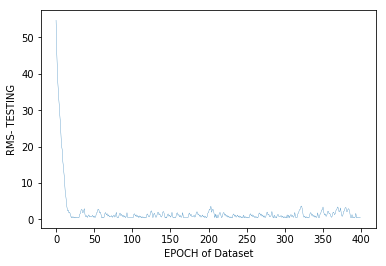

In [389]:
W_Now        = np.dot(220, W)
# hyperparameter 
La           = 2
#lamda
#hyperparameter 
learningRate = 0.1
#0.1 test = 0.64
#0.5 test =
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []
acc  = []
L_Erms_Acc = []
#L_Erms_Val_acc = []


for i in range(0,400):
    #go through the phi matrix rows for the epochs which we set
    #print ('---------Iteration: ' + str(i) + '--------------')
    
    Delta_E_D     = -np.dot((TrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    # update weights
    
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
    Erms_TR       = GetErms(TR_TEST_OUT,TrainingTarget)
    
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,ValDataAct)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,TestDataAct)
    acc.append(float(Erms_TR.split(',')[0]))
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    
    L_Erms_Acc.append(float(Erms_Test.split(',')[0]))

#plot the graph
plt.plot([m for m in range(0,400)], L_Erms_Test, linewidth = 0.30);
plt.xlabel("EPOCH of Dataset")
plt.ylabel("RMS- TESTING")
plt.show()
#%matplotlib inline
#df = pd.DataFrame(Erms_Test)
#df.plot(subplots=True, grid=True, figsize=(10,15))

In [390]:
print ("")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))
print ("Testing Accuracy = " + str(np.around(max(L_Erms_Acc),5)))



E_rms Training   = 0.4577
E_rms Validation = 0.47673
E_rms Testing    = 0.43316
Testing Accuracy = 74.90494
